#### Source of materials: https://github.com/Ewelina04/xai_teamwork

## Load libraries

In [ ]:
!python -m pip install pandas --quiet
!python -m pip install numpy --quiet
!python -m pip install nltk --quiet
!python -m pip install matplotlib --quiet
!python -m pip install seaborn --quiet
!python -m pip install -U spacy --quiet

In [ ]:
!python -m spacy download en_core_web_sm --quiet

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
import pandas as pd
pd.set_option("max_colwidth", 200)
pd.set_option("display.max_columns", None)

import numpy as np

from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme(style="whitegrid")
plt.style.use("seaborn-talk")

import nltk
nltk.download('stopwords')
from nltk.collocations import *

In [ ]:
# simple cleaning text data - removing stopwords, punctuation, numbers and 
def clean(messg):
  messg = nlp(str(messg))
  doc = " ".join(char.lemma_ for char in messg if (not char.is_stop and not char.is_punct and not char.like_num and len(char) > 4))
  return doc

# pos tagging with spacy
def pos_tag(messg):
  messg = nlp(str(messg))
  doc = " ".join(char.pos_ for char in messg)
  return doc

## Load data

In [ ]:
data = pd.read_excel(r'C:\Users\user1\Downloads\workshop\work_file.xlsx')
print(data.shape)
data.head(2)

(715, 7)


,text1(conclusion),text2(premise),map_ID,logos,original_text2(premise),speaker,force
0,tonight we hear about what people want to do,KASICH wants to tell the audience what he's done,10837,CA,KASICH : I want to tell you what I've done,KASICH,Asserting
1,that young men are not in poverty and susceptible to radicalization,That is nonsense,10867,CA,"CRUZ : That, with all due respect, is nonsense",CRUZ,Asserting


## Data description 

**text1(conclusion)** - content of an illocution1 (the one that is being attacked/supported/rephrased) \

**text2(premise)** - content of an illocution2 (the one that attcks/supports/rephrases other illocution) \

**map_ID** - id of a map (nodeset) in AIF format (annotated with OVA tool) the text comes from \

**logos** - type of logos relation between **text1(conclusion)** and **text2(premise)**; here we have 3 types: RA - support, CA - attack, MA - rephrase \

**original_text2(premise)** - content of a locution for the illocution in **text2(premise)**  

**speaker** - name of the author of the statement \

**force** - illocutionary force of **text2(premise)** 




# Analysis

## **Quantitative**

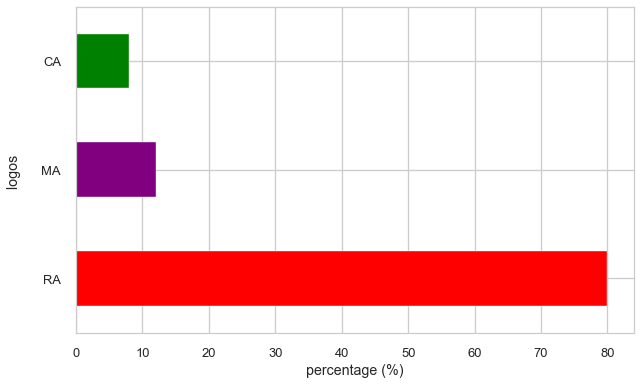

In [ ]:
plt.figure(figsize=(10, 6))
(data.logos.value_counts(normalize=True).round(2)*100).plot(kind = 'barh', 
                                                            color = ['red', 'purple', 'green'], 
                                                            )
plt.ylabel('logos \n')
plt.xlabel('percentage (%)')
plt.show()

# frequency of logos types

In [ ]:
data['force'].nunique()

# how many types of illocutionary force are in the data

5

In [ ]:
data['force'].value_counts()

# how many instances of each illocutionary force type are in the data

Asserting                 693
Assertive Questioning      13
Rhetorical Questioning      5
Assertive Challenging       2
Pure Questioning            2
Name: force, dtype: int64

In [ ]:
data['force'].value_counts().apply(lambda x: np.log(x))

Asserting                 6.541030
Assertive Questioning     2.564949
Rhetorical Questioning    1.609438
Assertive Challenging     0.693147
Pure Questioning          0.693147
Name: force, dtype: float64

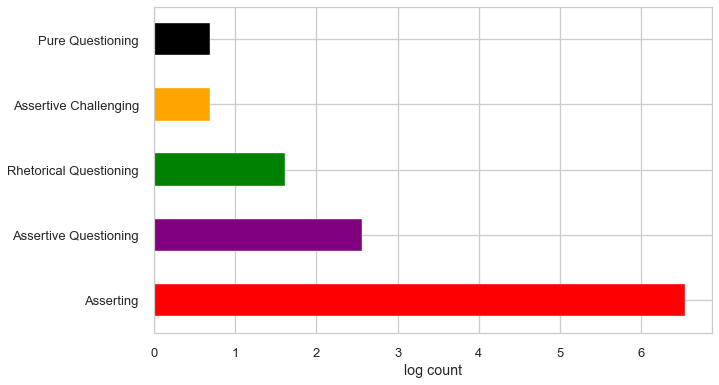

In [ ]:
data['force'].value_counts().apply(lambda x: np.log(x)).plot(kind = 'barh', 
                                                            color = ['red', 'purple', 'green', 'orange', 'black'], 
                                                            figsize=(10, 6)
                                                            )
plt.xlabel('log count')
plt.show()

# how many instances of each illocutionary force type are in the data (visualise proportions)

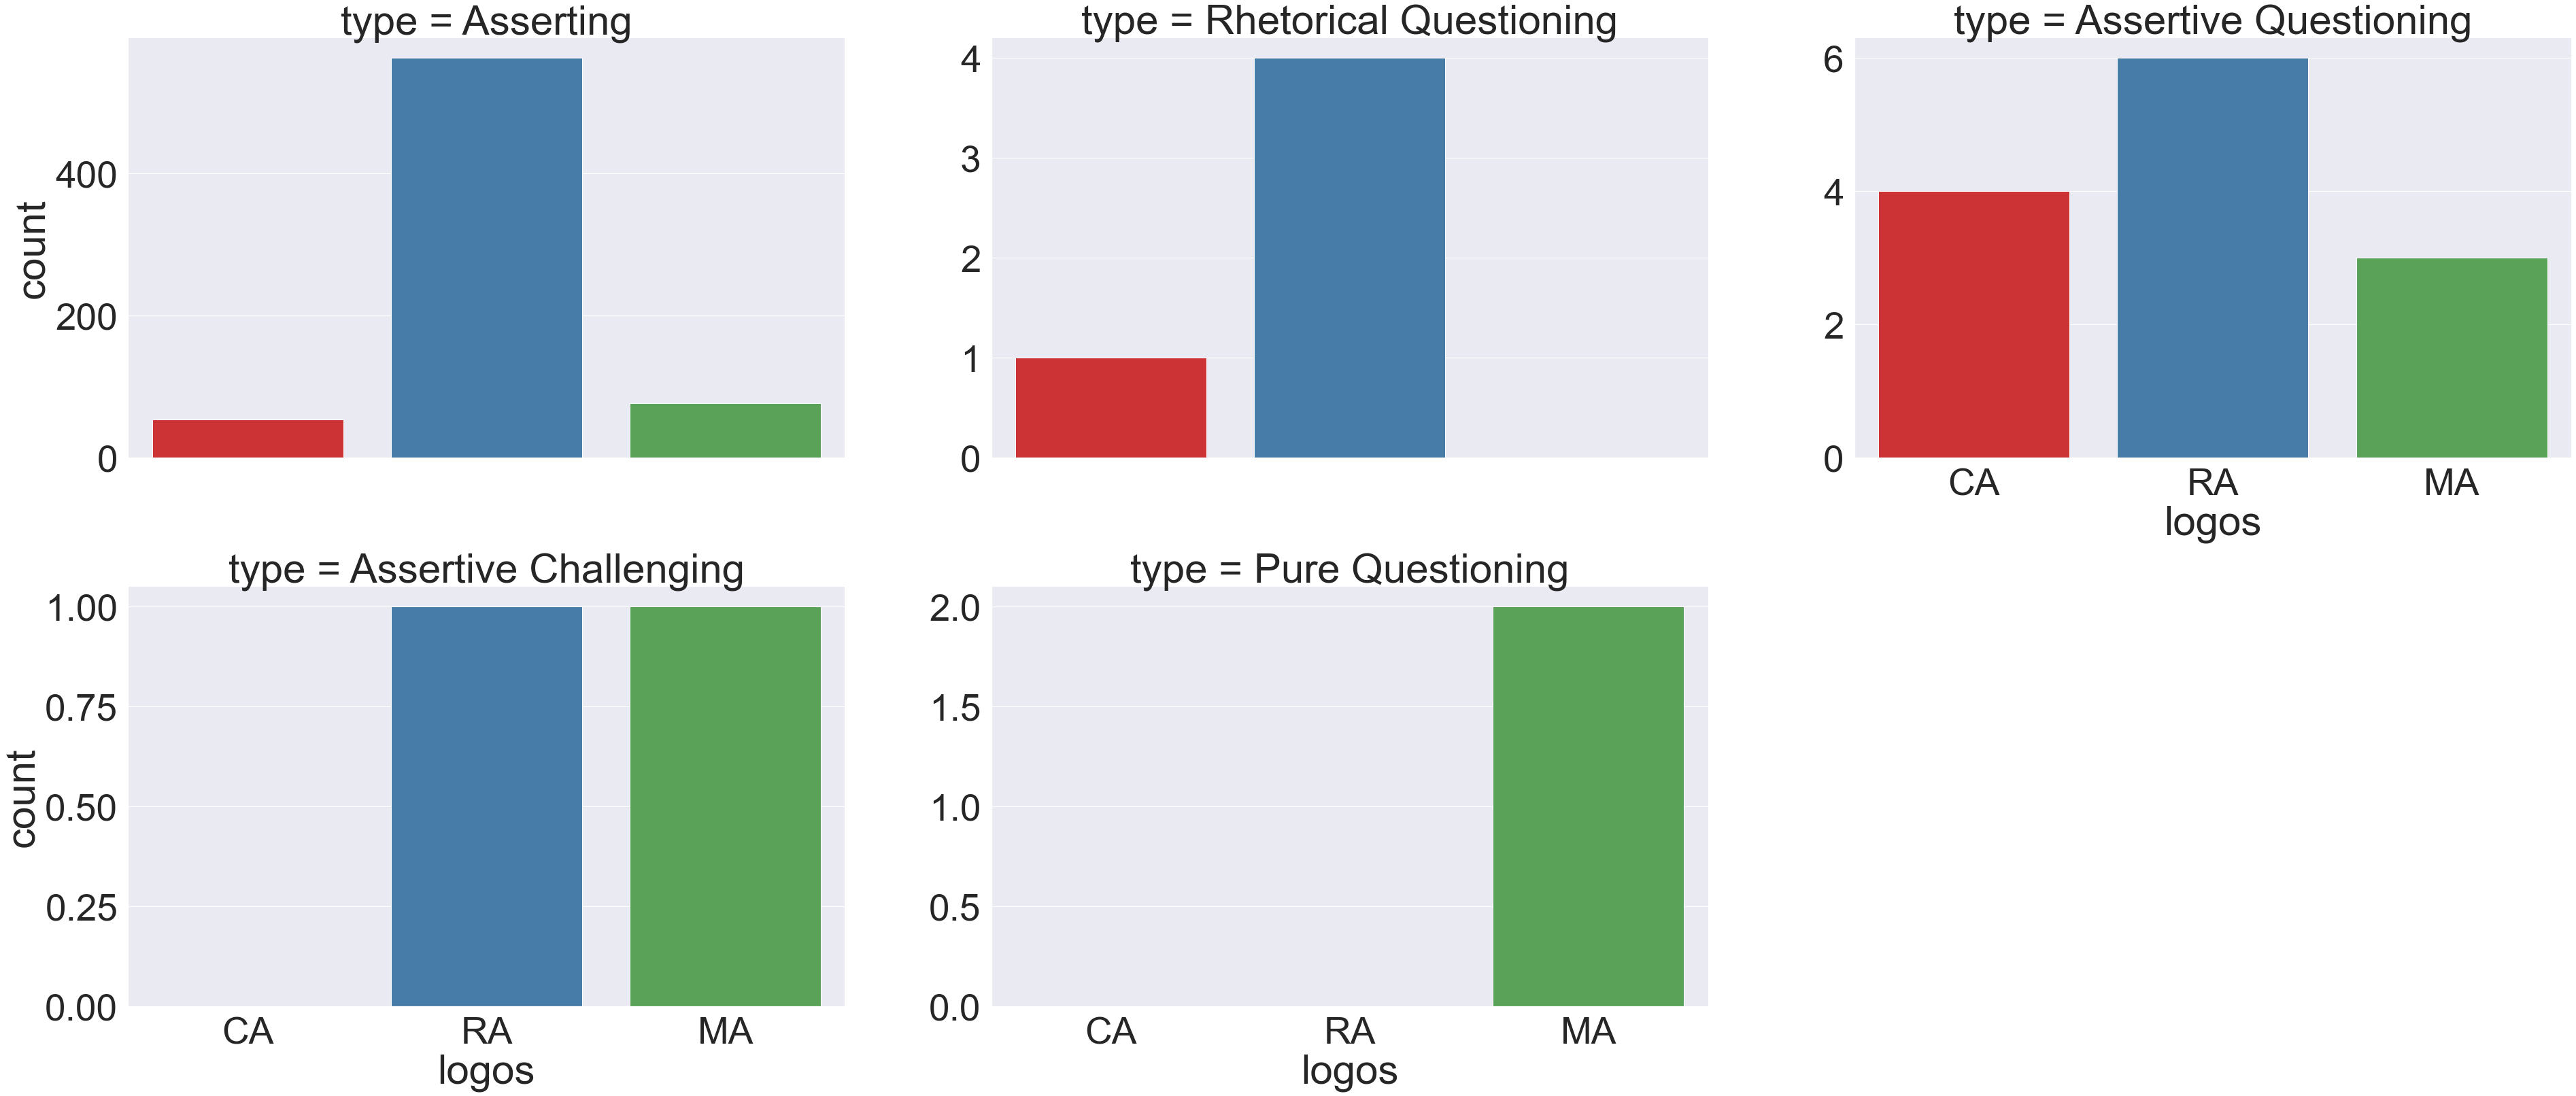

In [ ]:
sns.set(font_scale=5)
ax=sns.catplot(data = data, x = 'logos', hue = 'logos', col = 'force', 
            kind = 'count', height=12, aspect = 1.5, palette='Set1', col_wrap = 3, 
            sharey=False, dodge=False, )
plt.show()

# how many instances of combination of logos and illocutionary force types are in the data

In [ ]:
data_trump = data[data.speaker == 'TRUMP']
data_trump.shape[0]

# how many statements (ADU units) are made by Trump

100

In [ ]:
data_trump['force'].value_counts(normalize=True).round(3)*100

# the distribution of each illocutionary force type used by Trump

Asserting                98.0
Pure Questioning          1.0
Assertive Challenging     1.0
Name: force, dtype: float64

Text(0.5, 0, 'percentage %')

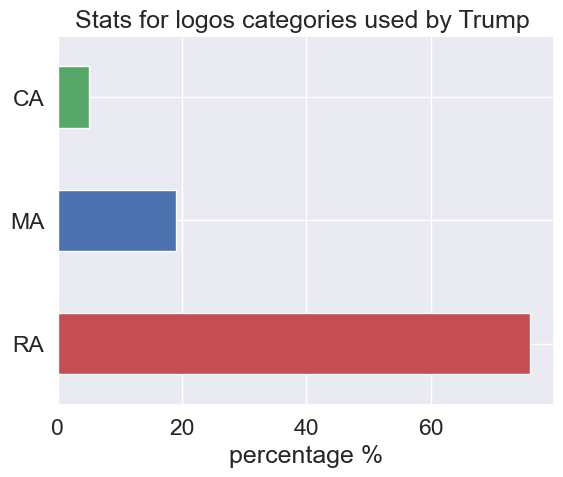

In [ ]:
sns.set(font_scale=1.5)
(data_trump['logos'].value_counts(normalize=True).round(3)*100).plot(kind='barh', 
                                                                     color=['r', 'b', 'g'], 
                                                                    title='Stats for logos categories used by Trump ')
plt.xlabel('percentage %')

# the distribution of logos categories in Trump's texts

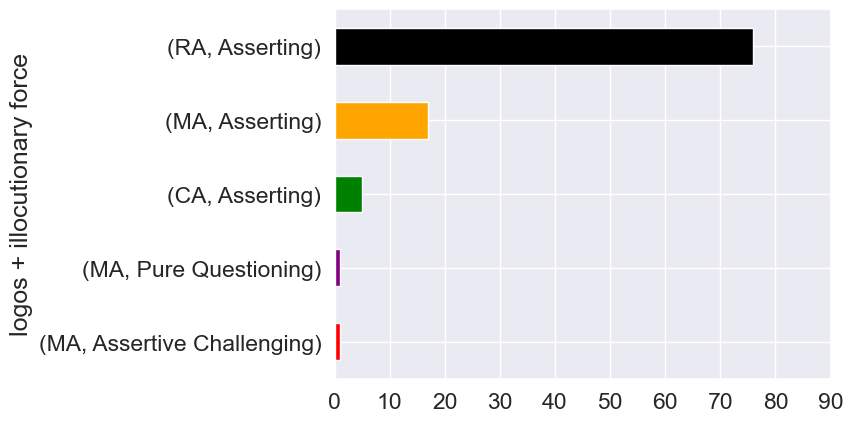

In [ ]:
(data_trump.groupby(['logos', 'force'], as_index=True).size().sort_values()).plot(kind = 'barh', 
                                                                   xlabel = 'logos + illocutionary force',
                                                                  color = ['red', 'purple', 'green', 'orange', 'black'])
plt.xticks(np.arange(0, 100, 10))
plt.show()

# the distribution of logos categories combined with illocutionary force types in Trump's texts

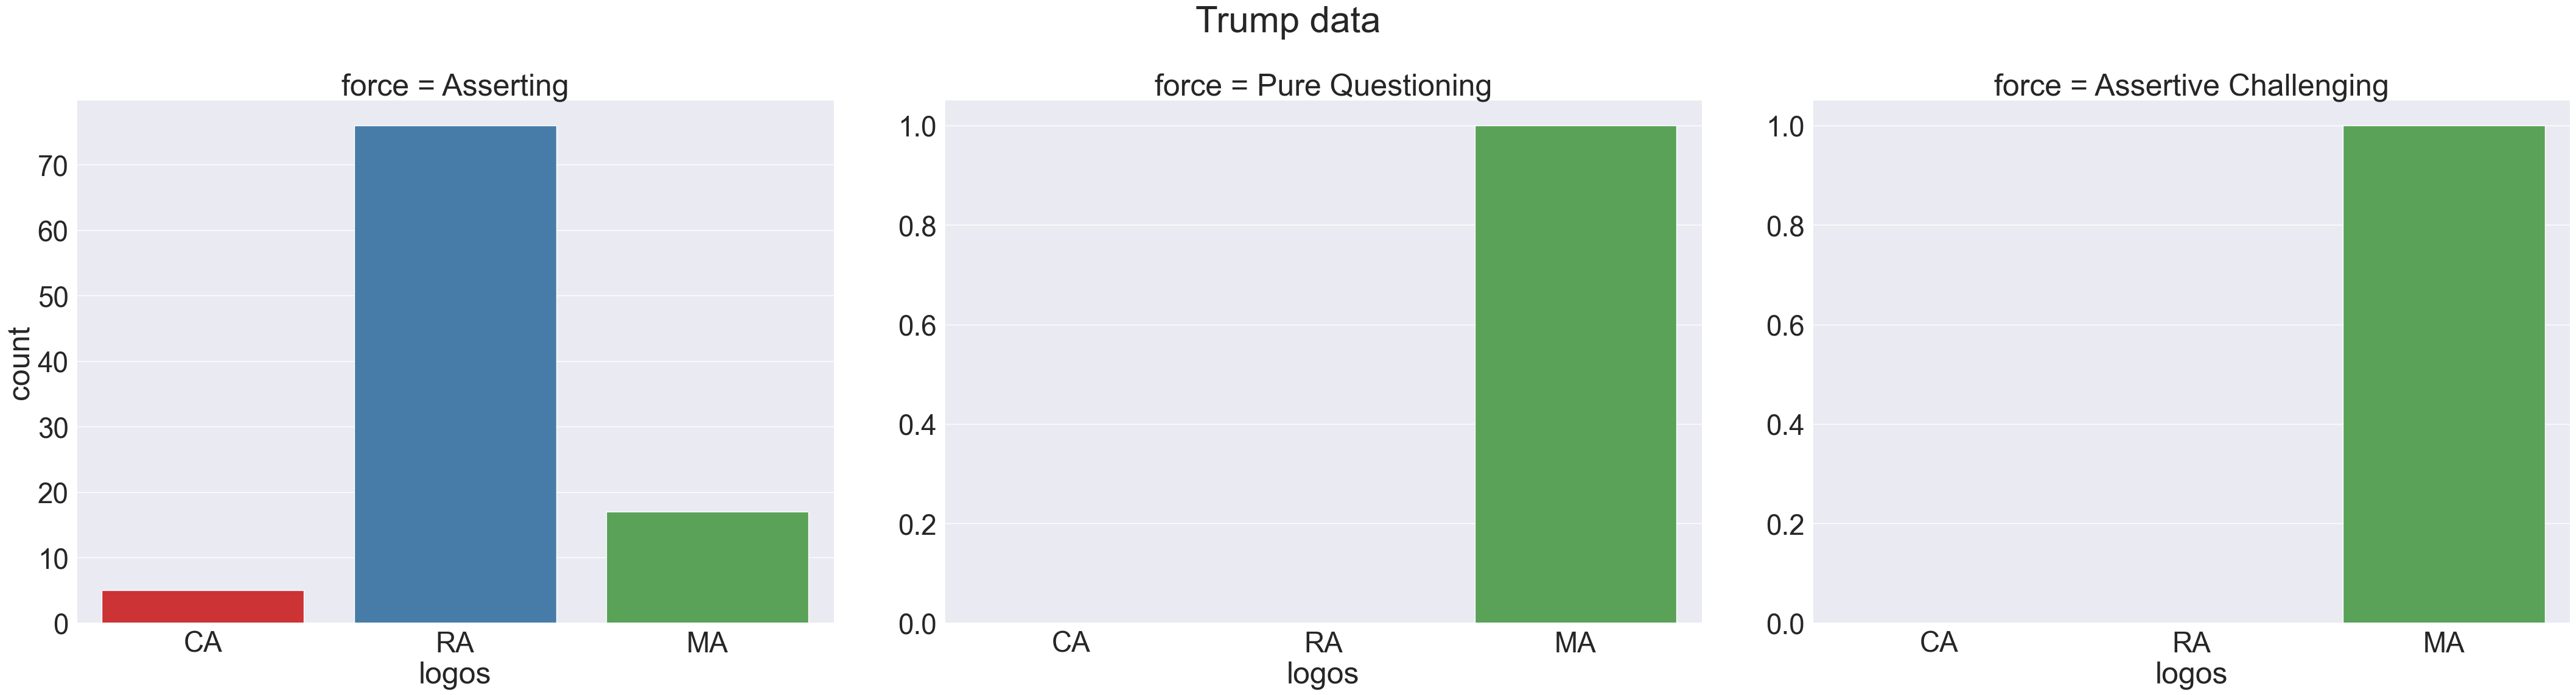

In [ ]:
sns.set(font_scale=3)
ax=sns.catplot(data = data_trump, x = 'logos', hue = 'logos', col = 'force', 
            kind = 'count', height=12, aspect = 1.2, palette='Set1', col_wrap = 3, 
            sharey=False, dodge=False, )

ax.fig.subplots_adjust(top=0.85)
ax.fig.suptitle('Trump data')
plt.show()

# the distribution of logos categories combined with illocutionary force types in Trump's texts (another way of visualisation)

In [ ]:
data.head(2)

,text1(conclusion),text2(premise),map_ID,logos,original_text2(premise),speaker,force
0,tonight we hear about what people want to do,KASICH wants to tell the audience what he's done,10837,CA,KASICH : I want to tell you what I've done,KASICH,Asserting
1,that young men are not in poverty and susceptible to radicalization,That is nonsense,10867,CA,"CRUZ : That, with all due respect, is nonsense",CRUZ,Asserting


In [ ]:
data.speaker.unique()

array(['KASICH', 'CRUZ', 'CHRISTIE', 'BAIER', 'PAUL', 'CARSON', 'RUBIO',
       'KELLY', 'TRUMP', 'WALKER', 'WALLACE', 'HUCKABEE', 'BUSH',
       'CHAIRMAN', 'COMMANDANT OF THE MARINE CORPS', 'ADAMS',
       'THE DEPARTMENT OF EDUCATION', 'FIORINA', 'DOLAN',
       "TRUMP's Critics"], dtype=object)

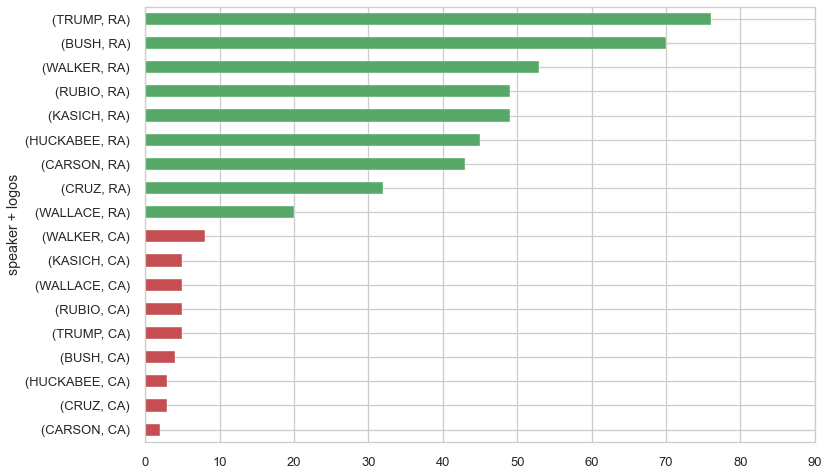

In [ ]:
selected_speakers = ['KASICH', 'CRUZ', 'CARSON', 'RUBIO', 'TRUMP', 'WALKER', 'WALLACE', 'HUCKABEE', 'BUSH']
selected_data = data[ (data.speaker.isin(selected_speakers)) & (data.logos.isin(['RA', 'CA'])) ]

(selected_data.groupby(['speaker', 'logos'], as_index=True).size().sort_values()).plot(figsize = (12, 8), kind = 'barh', 
                                                                    xlabel = 'speaker + logos', 
                                                                    color = ['r']*len(selected_speakers) + ['g']*len(selected_speakers), 
                                                                    xticks = np.arange(0, 100, 10))
plt.show()

# the distribution of selected logos categories for selected speakers

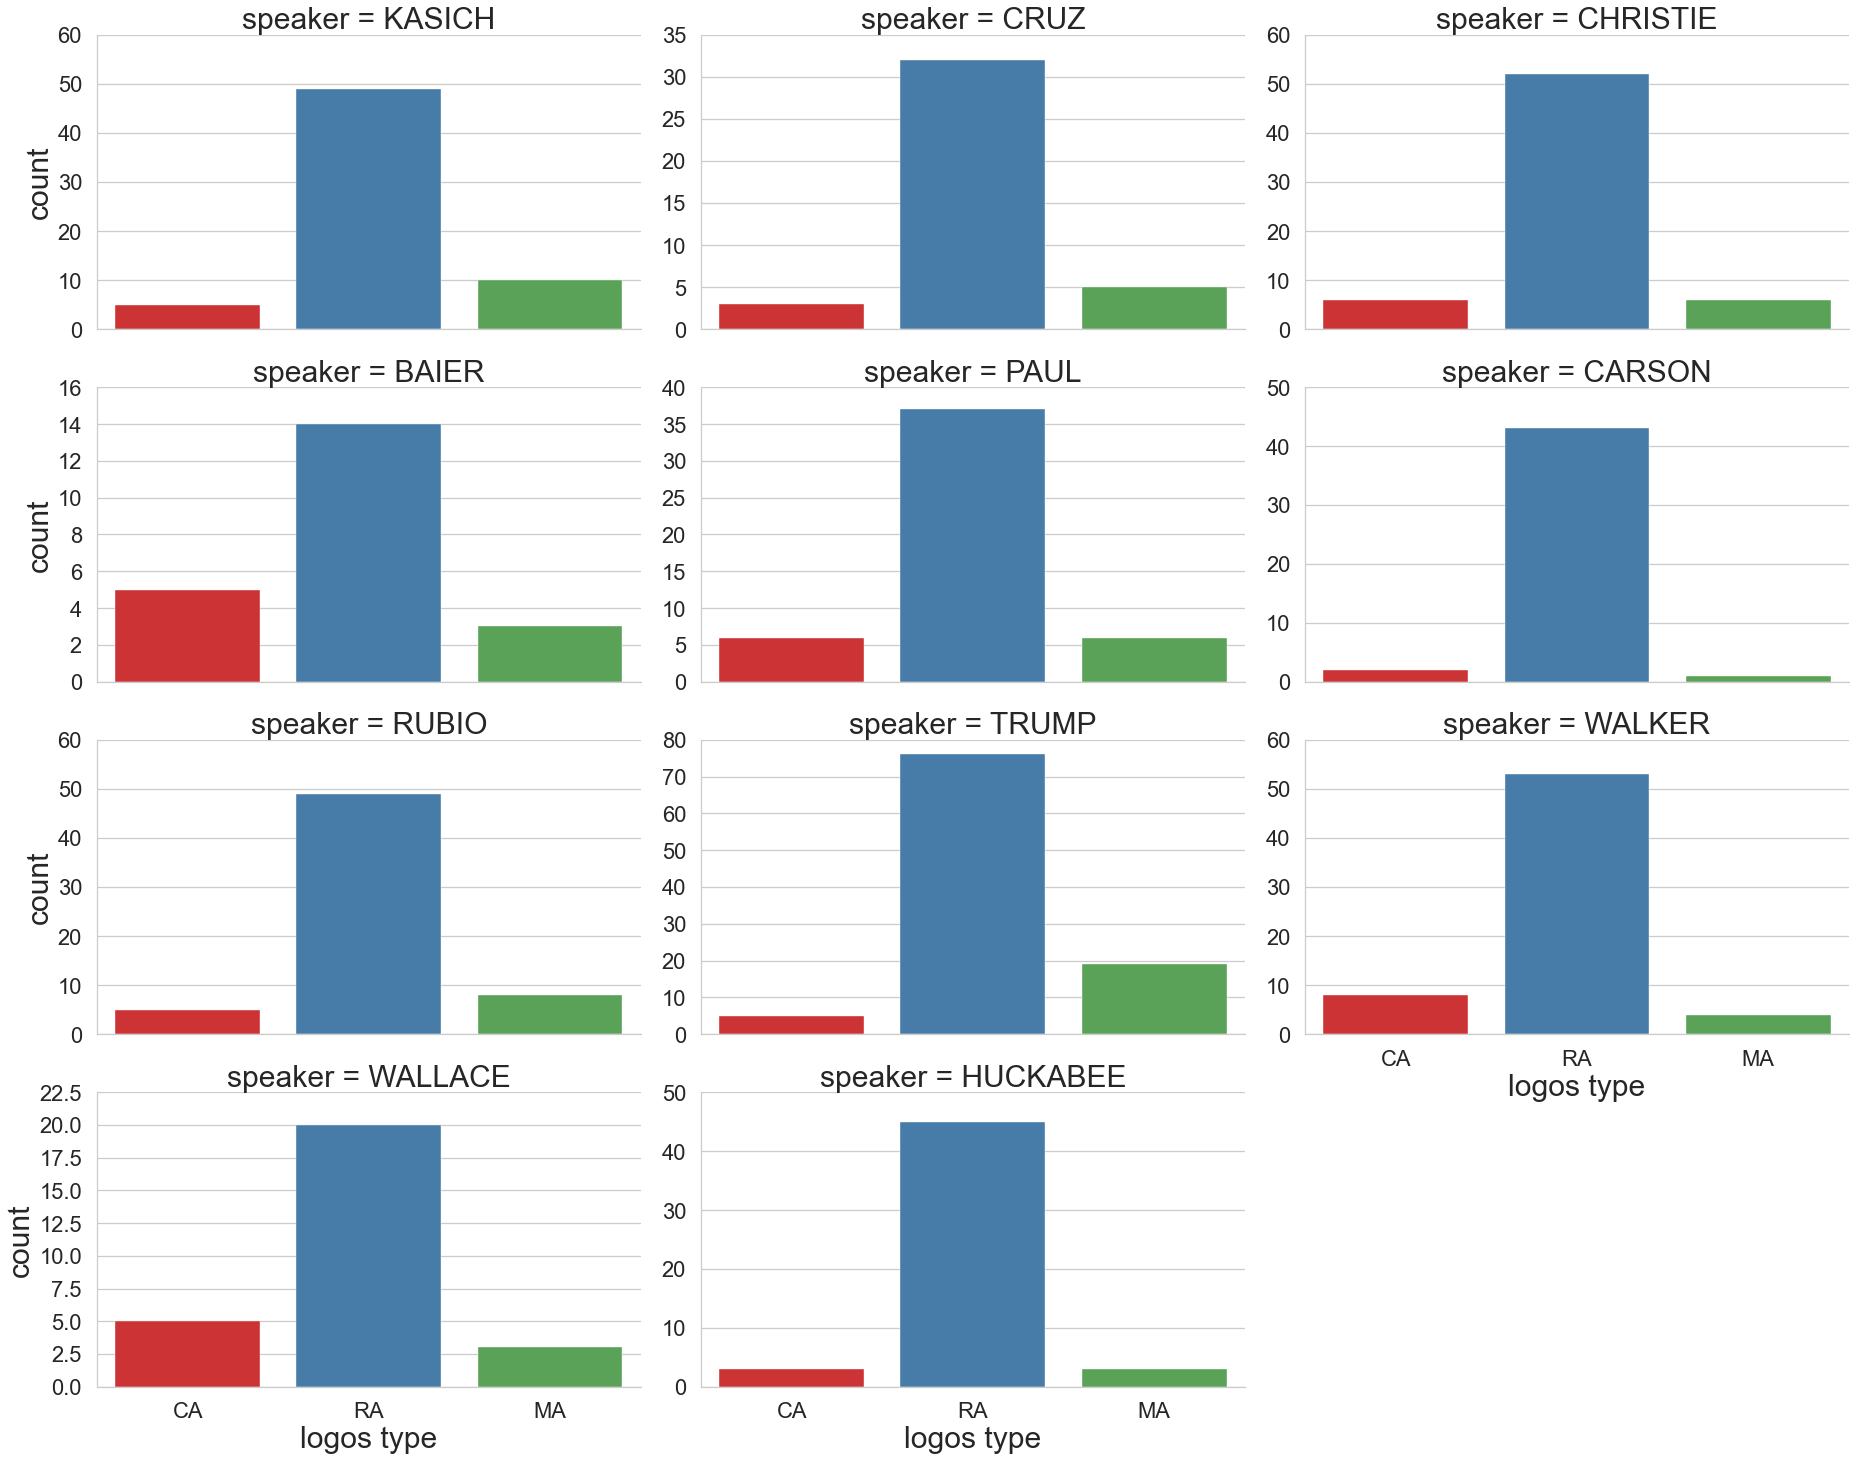

In [ ]:
sns.set_theme(style="whitegrid")
plt.style.use("seaborn-talk")

speaker_list = ['KASICH', 'CRUZ', 'CHRISTIE', 'BAIER', 'PAUL', 'CARSON', 'RUBIO','TRUMP', 'WALKER', 'WALLACE', 'HUCKABEE']
fig1 = sns.catplot(data = data[data.speaker.isin(speaker_list)], 
       x = 'logos', hue = 'logos', col = 'speaker', 
       kind = 'count', aspect = 1.7, palette='Set1', col_wrap = 3, 
       sharey=False, dodge=False)

fig1.set_yticklabels(size=22)
fig1.set_xticklabels(size=22)
fig1.set_axis_labels("logos force", "count", fontsize=30)
fig1.set_titles(size=30)

plt.show()

# the distribution of logos categories for each speaker

In [ ]:
text_ca = " ".join(set(data[data.logos == 'CA']['text2(premise)'].values))
text_ca = pos_tag(text_ca)
counter_ca = Counter(text_ca.split())

In [ ]:
df_counter_ca = pd.DataFrame.from_dict(counter_ca, orient='index', columns = ['frequency'])
df_counter_ca['percentage'] = (df_counter_ca['frequency'] / df_counter_ca['frequency'].sum()) * 100
df_counter_ca

,frequency,percentage
PRON,42,7.355517
AUX,59,10.332750
VERB,59,10.332750
DET,54,9.457093
PROPN,59,10.332750
ADV,32,5.604203
PART,25,4.378284
SCONJ,13,2.276708
NOUN,89,15.586690
ADJ,47,8.231173


In [ ]:
text_ra = " ".join(set(data[data.logos == 'RA']['text2(premise)'].values))
text_ra = pos_tag(text_ra)
counter_ra = Counter(text_ra.split())

In [ ]:
df_counter_ra = pd.DataFrame.from_dict(counter_ra, orient='index', columns = ['frequency'])
df_counter_ra['percentage'] = (df_counter_ra['frequency'] / df_counter_ra['frequency'].sum()) * 100
df_counter_ra

,frequency,percentage
PRON,616,9.252028
VERB,858,12.886753
DET,614,9.221989
NOUN,1206,18.113548
PART,298,4.475819
ADP,683,10.258336
PROPN,584,8.771403
AUX,511,7.674977
SCONJ,137,2.057675
ADJ,376,5.647342


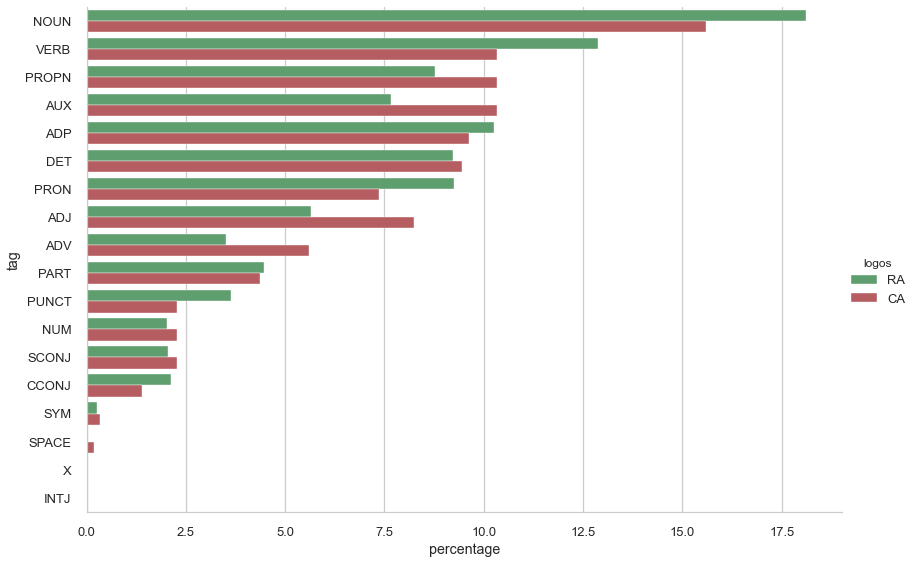

In [ ]:
df_counter_ra['logos'] = 'RA'
df_counter_ca['logos'] = 'CA'

df_counter = pd.concat([df_counter_ra, df_counter_ca], axis = 0)
df_counter = df_counter.reset_index().rename(columns={'index': 'tag'})

df_counter = df_counter.sort_values(by = 'percentage', ascending = False)

sns.catplot(kind = 'bar', data = df_counter, y = 'tag', x = 'percentage', 
            hue = 'logos', palette = ['g', 'r'], 
           aspect = 1.5, height = 8)
plt.show()

### **Excercises**

How is illocutionary force dependent on logos (MA, CA and RA) for Rubio?

Who attacks other statements most frequently?

Who supports other statements most frequently?

Who uses Rhetorical Questioning?

Who is Challenging? 
- print the names of those people

Is there a *text1(conclusion)* that is supported / attacked more than once?

How many forces of each type are in the work_file2?

What is the percentage of POS tags for MA?

## **Qualitative**

In [ ]:
example1 = data.loc[10, 'text2(premise)']
example1

'CARSON could take issue with all of those things'

In [ ]:
example1 = nlp(example1)

In [ ]:
# NER visualization
spacy.displacy.render(example1, style="ent", jupyter=True)

# Named Entity Recognition (NER) for the 10th text (model did not recognise the name)

C:\Users\user1\AppData\Local\Programs\Python\Python310\lib\site-packages\spacy\displacy\__init__.py:205: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [ ]:
example1 = " ".join([x if not x.isupper() else x.capitalize() for x in data.loc[10, 'text2(premise)'].split() ])
example1

# adjusting case (capitalized, not upper) for the name 

'Carson could take issue with all of those things'

In [ ]:
example1 = nlp(example1)

In [ ]:
# NER visualization
spacy.displacy.render(example1, style="ent", jupyter=True)

# Named Entity Recognition (NER) for the 10th text after some pre-processing (correctly recognised name)

In [ ]:
spacy.displacy.render(example1, style="dep", jupyter=True)

# dependency parser

In [ ]:
text2 = " ".join(set(data['text2(premise)'].values))
text2

'we have abandoned and alienated our friends and allies RUBIO wants that too still be possible for the people trying to do that now the American people are looking for someone to speak the truth Every time CHRISTIE did a case , CHRISTIE got a warrant from a judge in the eight years before CHRISTIE becomes governor , there was zero net private sector job growth in New Jersey BUSH governed as a conservative, and BUSH govern effectively BUSH wouldn\'t have gone in the Iraq like religious liberty US Air Force is at its smallest since 1940 71 % of federal spending right now is on entitlements , and debt service , 71 % TRUMP \'s already hedging TRUMP\'s bet on the Clintons KASICH balanced budgets and rising credit and tax cuts then we have to take care of the people that can\'t take care of themselves that\'s what we\'re taught when we have strong faith TRUMP has xxx specific evidence that the Mexican government is sending criminals across the border we need to control our border TRUMP has a

In [ ]:
text2_processed = nltk.text.Text(nltk.wordpunct_tokenize(text2))

# example1 is tokenized and then wrapped around special Text() class in nltk

In [ ]:
text2_processed.concordance("TRUMP", width=100)

# contexts in which Trump's name occurs

Displaying 25 of 53 matches:
w is on entitlements , and debt service , 71 % TRUMP ' s already hedging TRUMP ' s bet on the Clint
 debt service , 71 % TRUMP ' s already hedging TRUMP ' s bet on the Clintons KASICH balanced budget
 what we ' re taught when we have strong faith TRUMP has xxx specific evidence that the Mexican gov
cross the border we need to control our border TRUMP has a great company one of the best things we 
onditions on the ground BUSH did it at Florida TRUMP saw other instances millions and millions of J
ose who died in that war the latest example is Trump Entertainment Resorts It has been stolen from 
War II president Obama has had weak leadership TRUMP has a lot of liking for BUSH , but the last nu
ng today , not simply the issues we once faced TRUMP has used the chapter laws after the break , we
America were in or around Washington , D . C . TRUMP built a net worth of more than $ 10 billion KA
ering , maybe they should come illegally Yes , TRUMP is sure it was Oba

In [ ]:
text2_processed.concordance("OBAMA", width=100)

# contexts in which Obama's name occurs

Displaying 15 of 15 matches:
 done it 27 times since World War II president Obama has had weak leadership TRUMP has a lot of lik
r lives We ' re not going on win by doing what OBAMA and CLINTON do each and every day . Dividing t
eath warrant we need to deal with this problem OBAMA left Iraq Eighty percent of the people in our 
 it was ObamaCare is a complete disaster under Obama and Clinton , there was a lot of mush over the
ons the net result is USA are not growing fast OBAMA vilifies everyone who disagrees with him TRUMP
iculty in communities Use the Fourth Amendment OBAMA became president , and he abandoned Iraq WALKE
 the truth and do what CRUZ said CRUZ would do Obama broke every rule of negotiation Caesars just w
ction in large portions of the world President Obama declined to use military force against the Ass
, and they ca n ' t get in the court has ruled Obama ' s weak leadership has led to bad choices WAL
iving in poverty today , more than when Barack Obama got elected Nobody

In [ ]:
text2_processed.concordance("Clinton", width=100)

# contexts in which Clinton's name occurs

Displaying 11 of 11 matches:
' re not going on win by doing what OBAMA and CLINTON do each and every day . Dividing the country 
safe after eight years of this administration CLINTON cannot lecture RUBIO about student loans BUSH
maCare is a complete disaster under Obama and Clinton , there was a lot of mush over the last two y
nd Chinese government know more about Hillary Clinton ' s e - mail server than do the members of th
the race over to Democrats and likely another Clinton it was worse when CHRISTIE got there HUCKABEE
 , very proud to say that TRUMP is pro - life CLINTON has been in office and in government longer t
t was based on that if RUBIO is our nominee , CLINTON cannot lecture RUBIO about living paycheck to
ir very families everywhere in the world that CLINTON touched is more messed up today than before s
 this election is a resume competition , then CLINTON is gonna be the next president BUSH is his ow
 we are leading from behind under the Obama - Clinton doctrine What God

In [ ]:
text2_processed.common_contexts(['military'])

# what are the contexts words for 'military'

the_is the_to no_solution their_policies use_force our_trump the_right


In [ ]:
text2_processed.common_contexts(['liberty'])

# what are the contexts words for 'liberty' 

religious_us religious_,


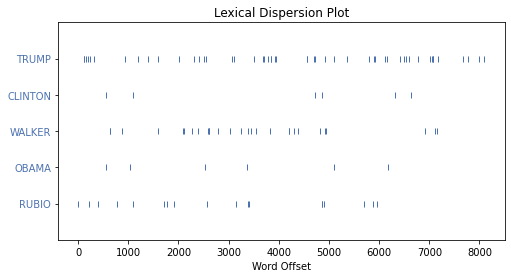

In [ ]:
plt.figure(figsize=(8,4))
plt.style.use('default')
text2_processed.dispersion_plot(["TRUMP", "CLINTON", "WALKER", "OBAMA", "RUBIO"])

# where in a debate (assuming we have the correct order in time for texts) selected names are mentioned

In [ ]:
text2 = clean(text2)
text2

"abandon alienate friend ally RUBIO want possible people try american people look speak truth CHRISTIE CHRISTIE warrant judge year CHRISTIE governor private sector growth Jersey govern conservative govern effectively religious liberty Force small federal spending right entitlement service TRUMP hedge TRUMP Clintons KASICH balanced budget rise credit people teach strong faith TRUMP specific evidence mexican government send criminal border control border TRUMP great company thing government RUBIO stand change condition ground Florida TRUMP instance million million japanese come governor state Florida call family late example Trump Entertainment Resorts steal KASICH choose expand Medicaid KASICH state unlike governor stage tonight time World president Obama leadership TRUMP like number month brother administration catastrophe honor blessing people office wait year United States understand nominee RUBIO justify end begin violently fault robust accountability people wage decline dramaticall

In [ ]:
tokens = nltk.wordpunct_tokenize(text2)
tokens = [t for t in tokens if len(t) > 4]

tokens[:20]

# tokenize the text

['abandon',
 'alienate',
 'friend',
 'RUBIO',
 'possible',
 'people',
 'american',
 'people',
 'speak',
 'truth',
 'CHRISTIE',
 'CHRISTIE',
 'warrant',
 'judge',
 'CHRISTIE',
 'governor',
 'private',
 'sector',
 'growth',
 'Jersey']

In [ ]:
word_freq_dict = nltk.FreqDist(tokens)
word_freq_dict.most_common(20)

# 20 most common words (unigrams)

[('people', 54),
 ('TRUMP', 51),
 ('country', 35),
 ('CHRISTIE', 29),
 ('state', 25),
 ('government', 24),
 ('America', 22),
 ('KASICH', 20),
 ('thing', 19),
 ('RUBIO', 17),
 ('great', 15),
 ('WALKER', 15),
 ('CARSON', 14),
 ('system', 14),
 ('right', 13),
 ('world', 13),
 ('walker', 13),
 ('governor', 12),
 ('child', 12),
 ('stand', 11)]

In [ ]:
len(word_freq_dict)

# number of unique words (unigrams)

907

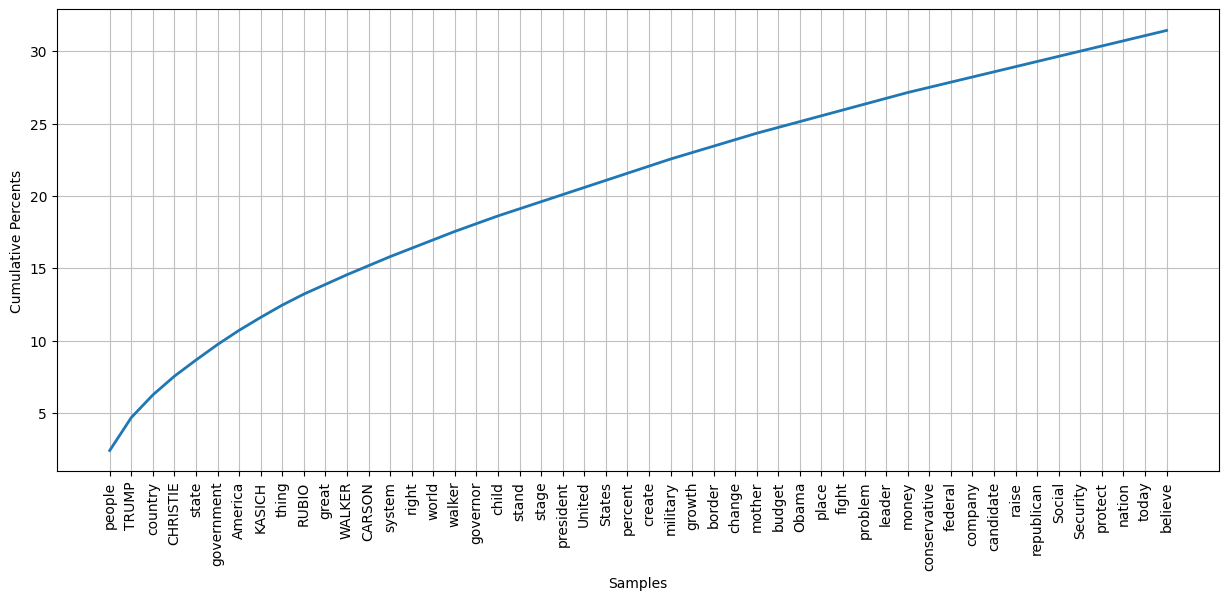

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Percents'>

In [ ]:
plt.figure(figsize=(15, 6))
word_freq_dict.plot(50, cumulative=True, percents = True)

# top 50 words account for over 30% of the text

In [ ]:
bigram_freq_dict = nltk.FreqDist(nltk.bigrams(tokens))
bigram_freq_dict.most_common(20)

# 20 most common bigrams

[(('United', 'States'), 10),
 (('Social', 'Security'), 8),
 (('mexican', 'government'), 6),
 (('CHRISTIE', 'governor'), 5),
 (('economic', 'growth'), 5),
 (('purpose', 'military'), 4),
 (('constitutional', 'amendment'), 4),
 (('single', 'payer'), 4),
 (('private', 'sector'), 3),
 (('governor', 'state'), 3),
 (('state', 'Florida'), 3),
 (('CHRISTIE', 'raise'), 3),
 (('illegal', 'immigration'), 3),
 (('world', 'today'), 3),
 (('commander', 'chief'), 3),
 (('unborn', 'child'), 3),
 (('people', 'think'), 3),
 (('Department', 'Education'), 3),
 (('Security', 'Medicare'), 3),
 (('payer', 'health'), 3)]

In [ ]:
text2_processed.collocations(window_size = 2)

# collocations in text

United States; Social Security; eight years; Mexican government;
constitutional amendment; economic growth; make sure; New Jersey;
private sector; take care; payer health; politically correct; bad
ones; tax increases; unborn child; illegal immigration; great job;
health system; went bankrupt; AAA bond


In [ ]:
text2_processed.collocations(window_size = 30)

CRUZ CRUZ; conservative hundreds; United States; year decade; Social
Security; hundreds Supreme; Bible CRUZ; CRUZ grow; New Jersey;
American operating; donor class; drugs decade; active duty; less
active; less duty; radical Islamic; constitutional amendment; Senator
CRUZ; balanced budget; take care


In [ ]:
trigram_freq_dict = nltk.FreqDist(nltk.trigrams(tokens))
trigram_freq_dict.most_common(20)

# 20 most common trigrams

[(('Social', 'Security', 'Medicare'), 3),
 (('single', 'payer', 'health'), 3),
 (('payer', 'health', 'system'), 3),
 (('private', 'sector', 'growth'), 2),
 (('TRUMP', 'hedge', 'TRUMP'), 2),
 (('evidence', 'mexican', 'government'), 2),
 (('governor', 'state', 'Florida'), 2),
 (('Trump', 'Entertainment', 'Resorts'), 2),
 (('republican', 'primary', 'debate'), 2),
 (('primary', 'debate', 'stage'), 2),
 (('CLINTON', 'lecture', 'RUBIO'), 2),
 (('apply', 'conservative', 'principle'), 2),
 (('CHRISTIE', 'Social', 'Security'), 2),
 (('borrow', 'money', 'China'), 2),
 (('CHRISTIE', 'raise', 'retirement'), 2),
 (('president', 'United', 'States'), 2),
 (('election', 'resume', 'competition'), 2),
 (('HUCKABEE', 'favor', 'constitutional'), 2),
 (('favor', 'constitutional', 'amendment'), 2),
 (('sustain', 'economic', 'growth'), 2)]

In [ ]:
from wordcloud import *

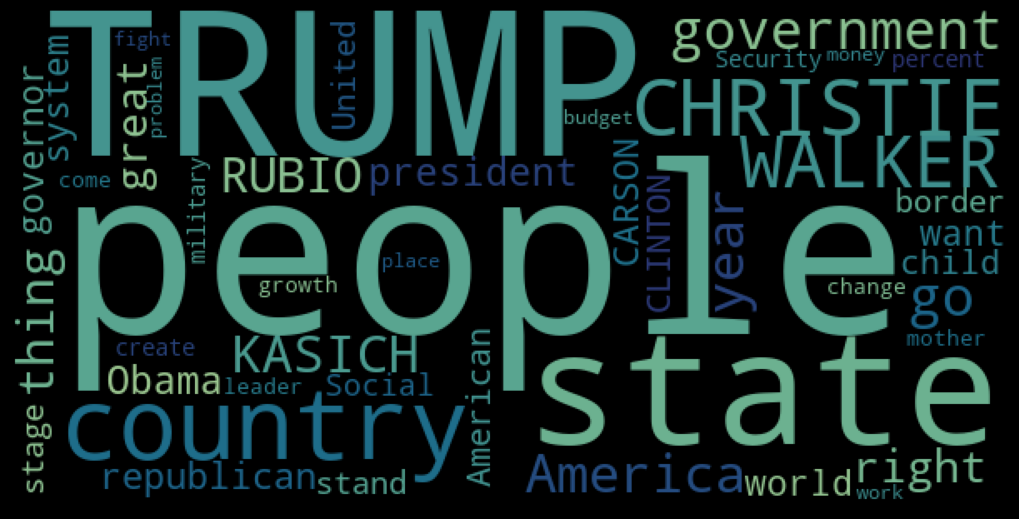

In [ ]:
wordcloud = WordCloud(max_words=50, colormap='crest', width = 600, height = 300,
                background_color ='black', min_font_size = 12, collocations = False).generate(text2)

plot_w = 10
plot_h = 5

plt.figure(figsize = (plot_w, plot_h), facecolor = 'black')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)    
plt.show()

# top 50 words in text

In [ ]:
print(wordcloud.words_.keys())

dict_keys(['people', 'TRUMP', 'state', 'country', 'CHRISTIE', 'WALKER', 'government', 'go', 'year', 'America', 'KASICH', 'thing', 'RUBIO', 'right', 'great', 'president', 'Obama', 'republican', 'want', 'governor', 'world', 'CARSON', 'system', 'American', 'CLINTON', 'child', 'border', 'stand', 'stage', 'United', 'Social', 'Security', 'percent', 'create', 'military', 'growth', 'change', 'come', 'mother', 'leader', 'budget', 'place', 'work', 'fight', 'problem', 'money', 'conservative', 'federal', 'company', 'candidate'])


In [ ]:
text_ca = " ".join(set(data[data.logos == 'CA']['text2(premise)'].values))
text_ca = clean(text_ca)
text_ca

"CARSON issue thing walker defunde Planned Parenthood year video RUBIO political process problem country politically correct Rosie O'Donnell HUCKABEE Social Security Medicare republican primary debate stage place nominee nonsense CHRSITIE absolutely believe Israel priority strong year administration TRUMP stand republican primary debate stage KASICH black walker position everyday America extraordinarily adequate response question illegal immigration walker unemployment percent percent KASICH opportunity bring resource RUBIO advocate issue constitutional amendment wrong listen senator sit subcommittee blow thing voter Wisconsin elect walker KASICH want audience Amendment President Reagan expand Medicaid time ideological problem CHRISTIE fundamentally misunderstand Rights America understand people government create defunde plan parenthood changer correct assessment RUBIO record responsible terrorism RUBIO expert independent certainly Democrats likely Clinton walker position consistent Am

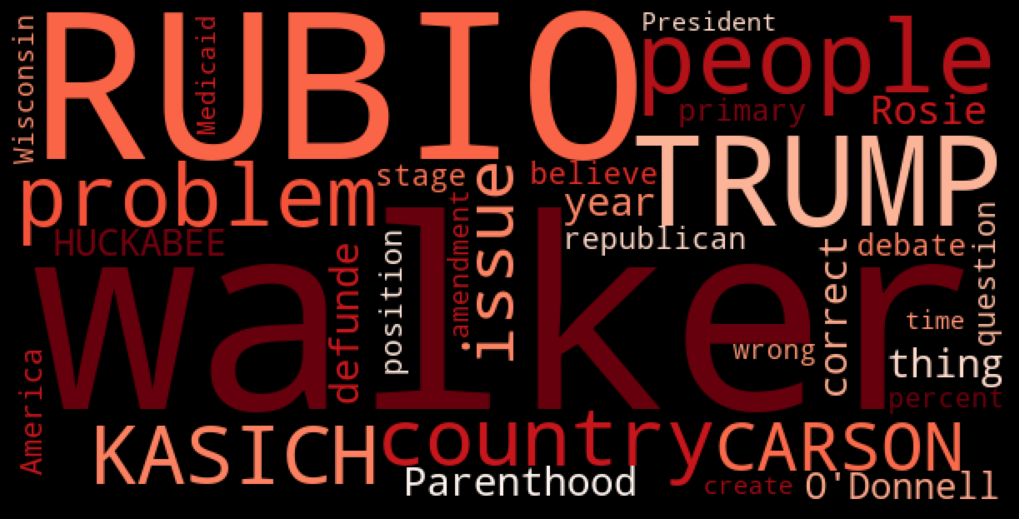

In [ ]:
wordcloud = WordCloud(max_words=50, colormap='Reds', width = 600, height = 300,
                background_color ='black', min_font_size = 12, collocations = False).generate(text_ca)

plot_w = 10
plot_h = 5

plt.figure(figsize = (plot_w, plot_h), facecolor = 'black')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)    
plt.show()

# top 50 words in text classified as logos attacks (CA)

In [ ]:
text_ra = " ".join(set(data[data.logos == 'RA']['text2(premise)'].values))
text_ra = clean(text_ra)
text_ra

"abandon alienate friend ally RUBIO want possible people try american people look speak truth CHRISTIE CHRISTIE warrant judge year CHRISTIE governor private sector growth Jersey govern conservative govern effectively religious liberty Force small federal spending right entitlement service TRUMP hedge TRUMP Clintons KASICH balanced budget rise credit people teach strong faith control border TRUMP great company thing government change condition ground Florida TRUMP instance million million japanese come governor state Florida call family late example Trump Entertainment Resorts steal KASICH choose expand Medicaid KASICH state unlike governor stage tonight president Obama leadership time World TRUMP like number month brother administration catastrophe honor blessing people office wait year United States understand nominee robust accountability people wage decline dramatically quadruple candidate stage lie stand hour Senate floor defend Americans right month CARSON unfamiliar major politic

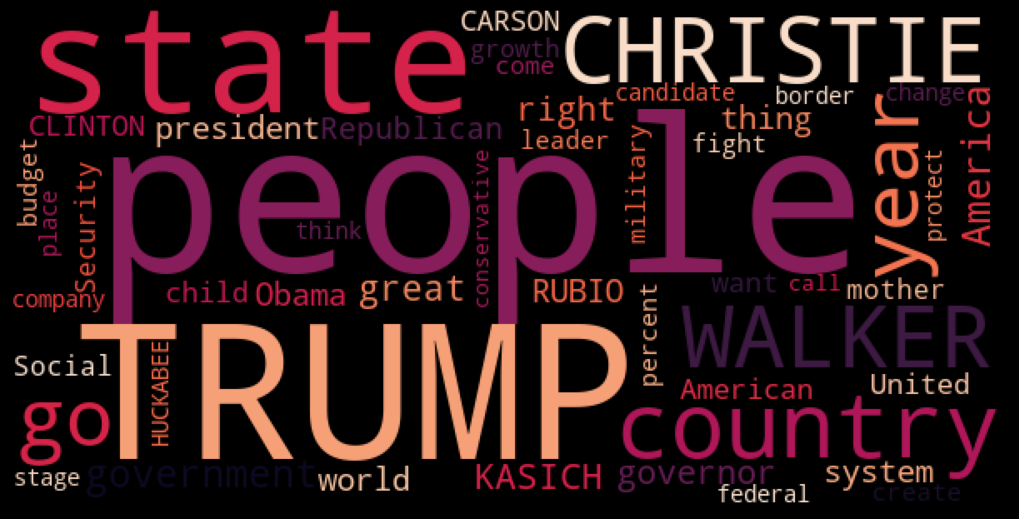

In [ ]:
wordcloud = WordCloud(max_words=50, colormap='rocket_r', width = 600, height = 300,
                background_color ='black', min_font_size = 12, collocations = False).generate(text_ra)

plot_w = 10
plot_h = 5

plt.figure(figsize = (plot_w, plot_h), facecolor = 'black')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)    
plt.show()

# top 50 words in text classified as logos supports (RA)

In [ ]:
df = pd.DataFrame.from_dict(wordcloud.words_.items())
df.columns = ['word', 'frequency']
df

,word,frequency
0,people,1.00
1,TRUMP,0.76
2,state,0.74
3,country,0.54
4,CHRISTIE,0.52
5,WALKER,0.48
6,year,0.42
7,go,0.42
8,government,0.38
9,America,0.38


## Excercises

Does Rubio and Trump use the same language for attacking (CA) other statements?

What are the top 20 words used by Rubio?

What are the common phrases (unigrams, bigrams) in Rhetorical Questioning?

What are the top 20 words in logos attacks (CA) made by Trump?

How many times Trump is mentioned in other texts that are logos supports (RA)?

## Try to do the same analytics for the second file - work_file2